# Decison Trees


In [ ]:
#Age: age of the patient (years)
#BMI: body mass index (kg/m2)
#Glucose: glucose concentration in blood (mg/dL)
#Insulin: insulin concentration in blood (microU/mL)
#HOMA: homeostatic model assessment of insulin resistance (glucose times insulin)
#Leptin: concentration of leptin - hormone of energy expenditure (ng/mL)
#Adiponectin: concentration of adiponectin - protein regulating glucose level (micro g/mL)
#Resistin: concentration of resistin - protein secreted by adipose tissue (ng/mL)
#MCP.1: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)
#Classification: Healthy (1) or patient (2)


In [27]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [28]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\Data Science\breastCancer.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


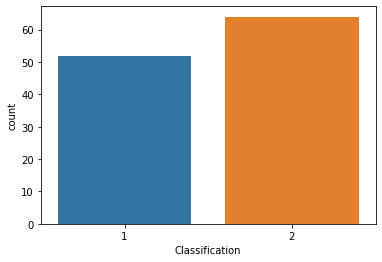

In [4]:
# check data balance
x=data['Classification']
ax=sns.countplot(x=x,data=data)

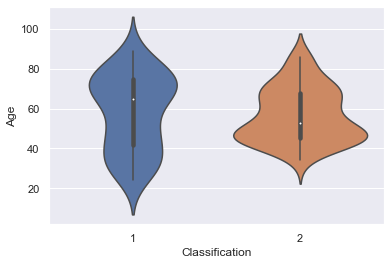

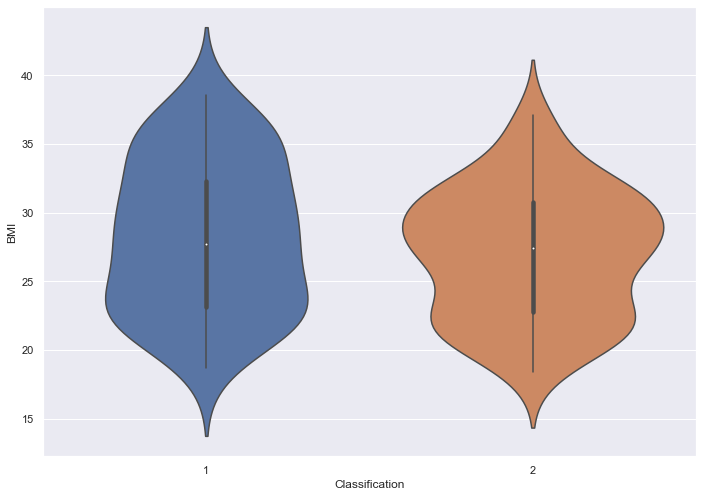

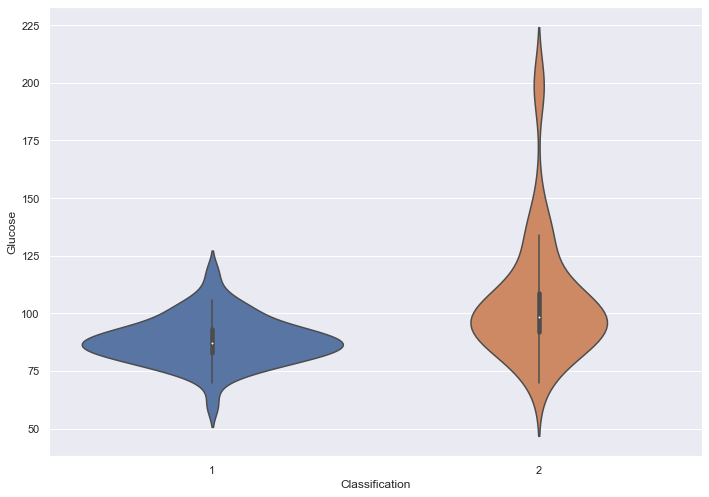

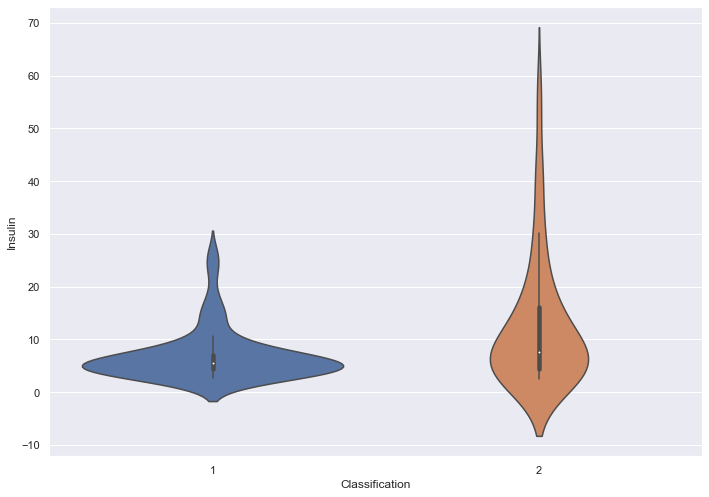

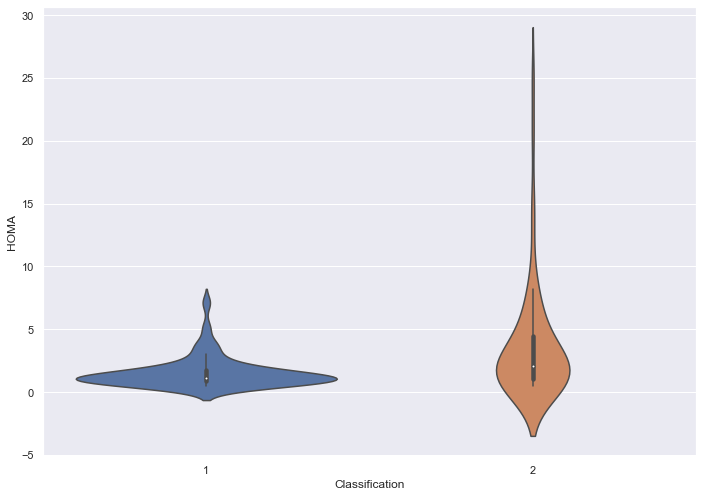

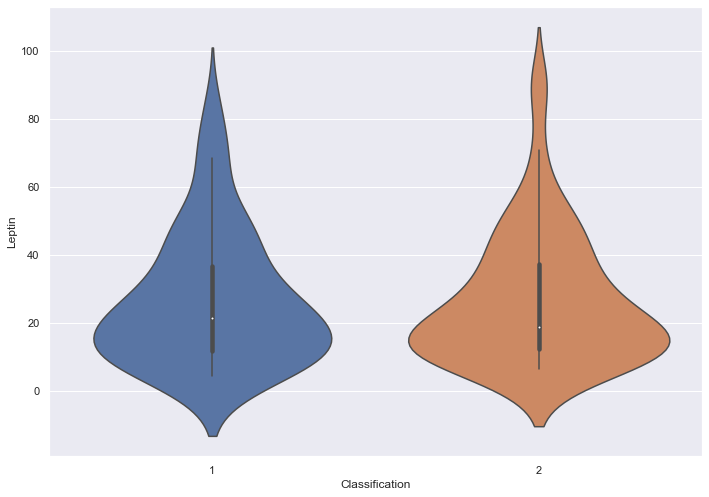

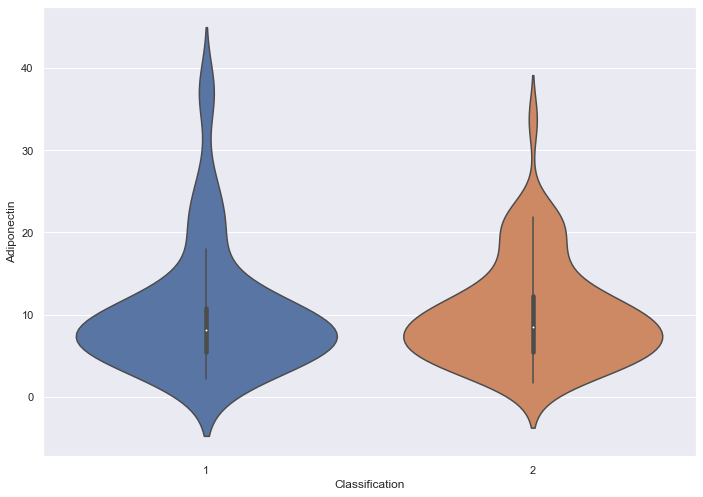

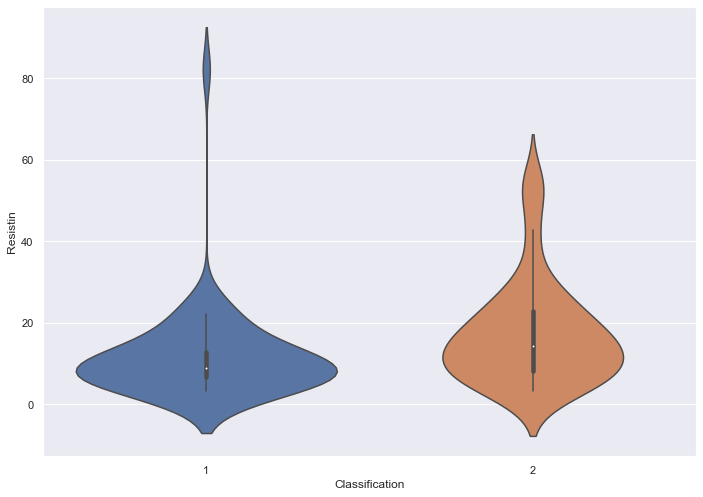

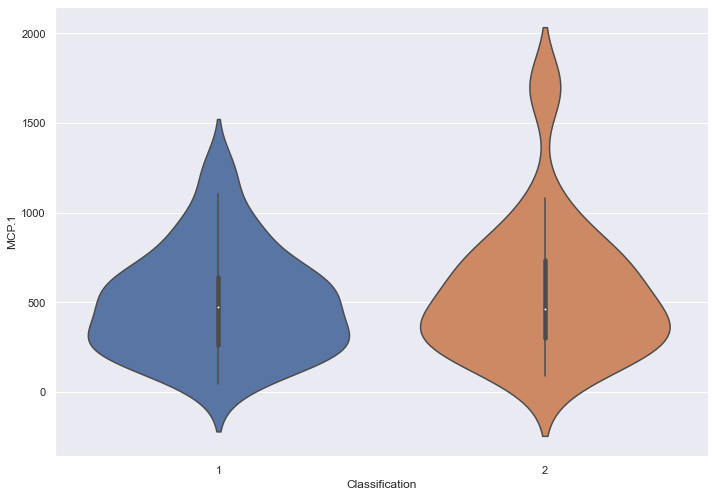

In [5]:
#distribution of each feature for both classes
def violin_plots(x,y,data):
    for i,col in enumerate (y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax=sns.violinplot(x=x,y=col,data=data)
y=data.columns[:-1]
x=data.columns[-1]

violin_plots(x,y,data)

In [6]:
#check for null value
for col in data.columns:
    print(f'{col}:{data[col].isnull().sum()}')

Age:0
BMI:0
Glucose:0
Insulin:0
HOMA:0
Leptin:0
Adiponectin:0
Resistin:0
MCP.1:0
Classification:0


## preprocessing

In [7]:
# Bring target variable into 0&1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data.head()


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [9]:
#split into train & test set
from sklearn.model_selection import train_test_split
#reshape
y=data['Classification'].values.reshape(-1,1)
X=data.drop(['Classification'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

## Baseline DecisionTree model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


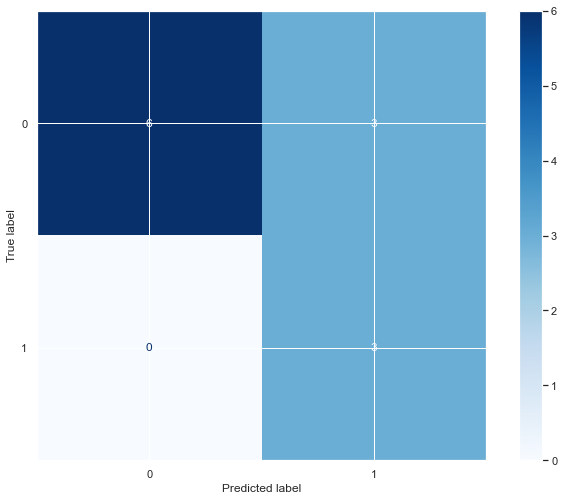

In [17]:
# create model
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
#confusion matrix
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues)
plt.show()

In [ ]:
# only 3 instances are misclassified

[Text(0.4861111111111111, 0.9285714285714286, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'X[5] <= 26.425\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.

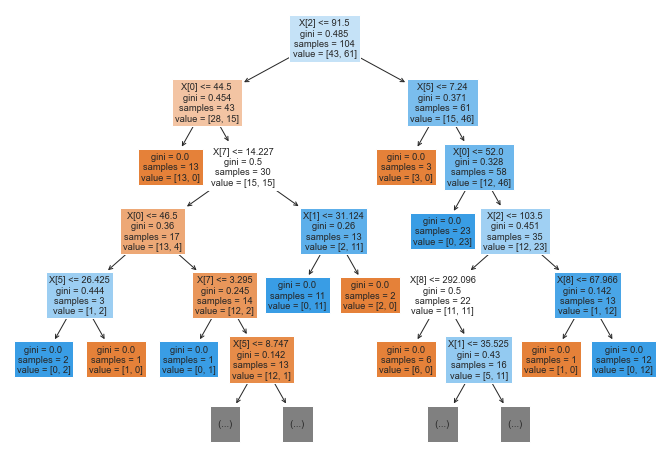

In [15]:
#visualize decision tree
from sklearn.tree import plot_tree
plot_tree(clf,max_depth=5,filled=True)

## Bagging

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


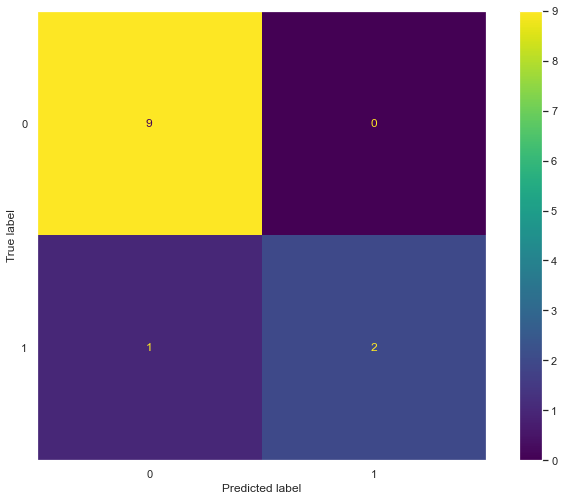

In [19]:
#bagging
from sklearn.ensemble import BaggingClassifier
bagging_clf=BaggingClassifier()
bagging_clf.fit(X_train,y_train.ravel())
#confusion matrix
plot_confusion_matrix(bagging_clf,X_test,y_test)
plt.grid(False)
plt.show()




In [ ]:
#only one instance is misclassified


## Random forest Classifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


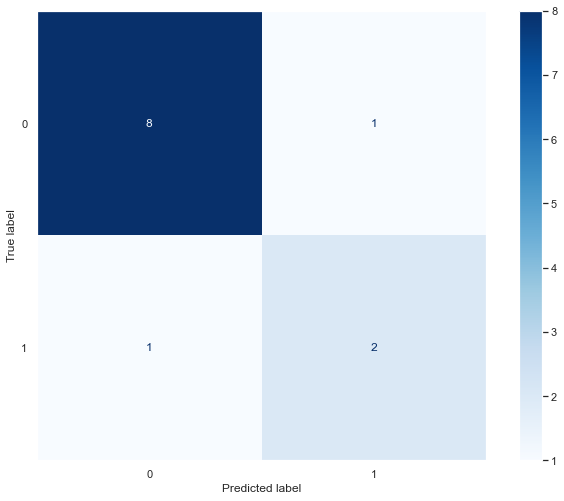

In [24]:
#Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(100)
random_clf.fit(X_train,y_train.ravel())
#confusion matrix
plot_confusion_matrix(random_clf,X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [ ]:
#only two instances are misclassified

## Boosting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


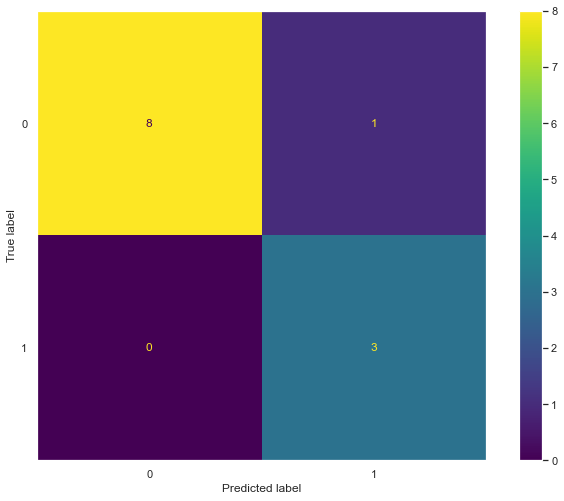

In [26]:
#boosting
from sklearn.ensemble import GradientBoostingClassifier
boost_clf=GradientBoostingClassifier()
boost_clf.fit(X_train,y_train.ravel())
#confusion matrix
plot_confusion_matrix(boost_clf,X_test,y_test)
plt.grid(False)
plt.show()

In [ ]:
#only one instance is misclassified